In [8]:
# import packages
import pybeam.precoded as pbp
import numpy as np


In [9]:
# define model
model = pbp.moving_thresholds(thresholds = 'linear')

# model parameters
model.parameters()


['tnd', 'w', 'mu', 'b', 'm']

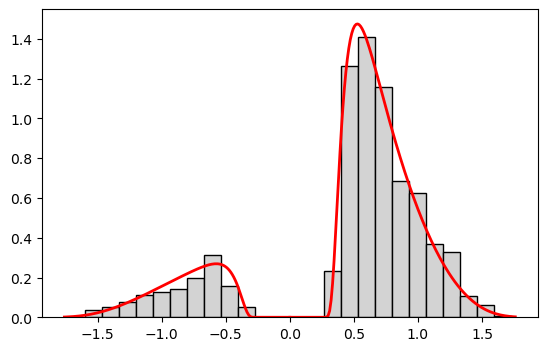

In [10]:
phi = {'tnd' : 0.25,          # non-decision time
         'w' : 0.5,           # relative start point
        'mu' : 1.0,           # drift rate
         'b' : 1.0,          # threshold
         'm' : 0.5} # shape parameter

rt = pbp.simulate(N_sims = 1000, model = model, phi = phi)
fig = pbp.plot_rt(model = model, phi = phi, rt_max = 1.75, rt = rt);


In [11]:
p = {'p_tnd' : 'Uniform("tnd", lower = 0.0, upper = 1.0)',
       'p_w' : 'Uniform("w", lower = 0.25, upper = 0.75)',
      'p_mu' : 'Uniform("mu", lower = -5.0, upper = 5.0)', 
       'p_b' : 'Uniform("b", lower = 0.1, upper = 2.5)',
       'p_m' : 'Uniform("m", lower = 0.0, upper = 2.0)'}

c0 = {'rt' : rt, 
     'tnd' : 'p_tnd',
       'w' : 'p_w',
      'mu' : 'p_mu',
       'b' : 'p_b',
       'm' : 'p_m'}

c = {0 : c0}

idata = pbp.inference(model = model,   
                     priors = p,       
                 conditions = c,       
                    samples = 25000,   
                     chains = 3,       
                      cores = 3,          
                  file_name = 'linear_thresholds')


Multiprocess sampling (3 chains in 3 jobs)
DEMetropolisZ: [m, b, mu, w, tnd]


/Users/matthewmurrow/opt/miniconda3/envs/pymc_env/lib/python3.10/site-packages/pymc/step_methods/metropolis.py:1024: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 3 chains for 0 tune and 25_000 draw iterations (0 + 75_000 draws total) took 37 seconds.


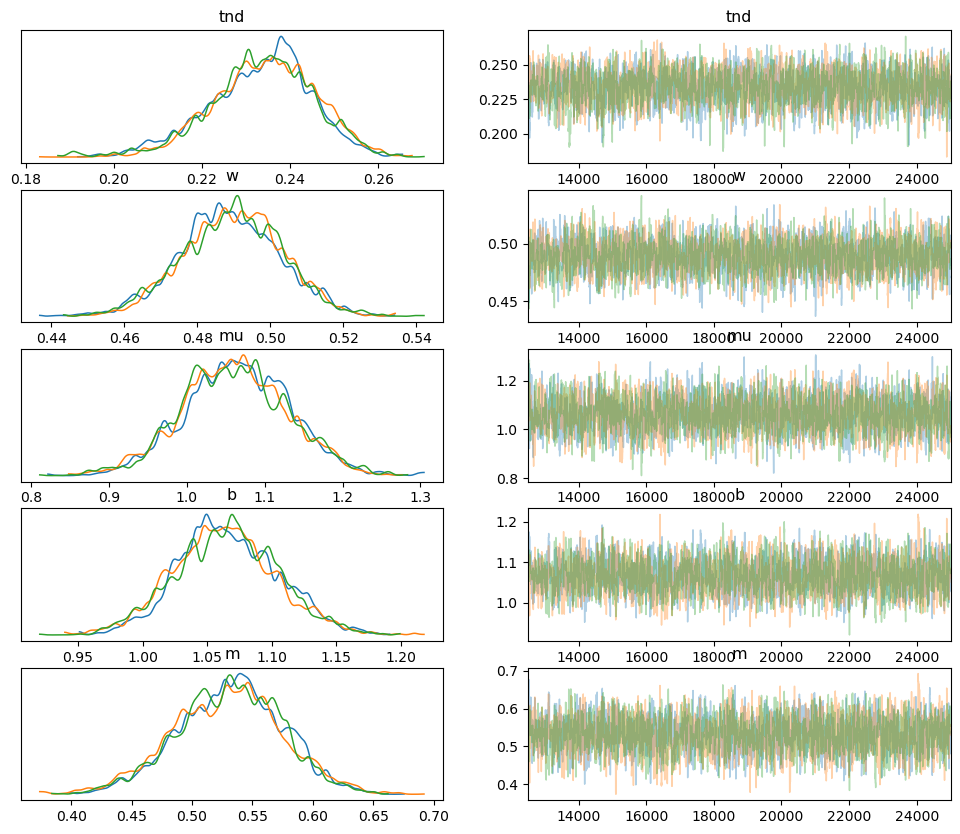

In [12]:
pbp.plot_idata(file_name = 'linear_thresholds', burnin = 12500);


In [13]:
pbp.summary(file_name = 'linear_thresholds', burnin = 12500)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
tnd,0.234,0.012,0.213,0.256,0.000,0.000,1679.0,2098.0,1.0
w,0.489,0.014,0.464,0.515,0.000,0.000,1847.0,2898.0,1.0
mu,1.063,0.068,0.945,1.197,0.002,0.001,1816.0,2985.0,1.0
b,1.065,0.039,0.992,1.139,0.001,0.001,1724.0,2873.0,1.0
m,0.531,0.044,0.450,0.615,0.001,0.001,1785.0,2706.0,1.0
